# Classification with Decision Tree


In [65]:
import numpy as np
import pandas as pd
from data_treatment import DataAtts
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz # Decision tree from sklearn

import pydotplus # Decision tree plotting
from IPython.display import Image

import ipywidgets as widgets
import glob

In [66]:
files_dropdown = widgets.Dropdown(
    options=glob.glob("original_data/*.csv"),
    description='Original file:',
    value = 'original_data/diabetes_escalonated.csv',
    disabled=False,
)
display(files_dropdown)



Dropdown(description='Original file:', index=4, options=('original_data/creditcard.csv', 'original_data/data.c…

In [67]:
folder_name = files_dropdown.value[14:-4]
print(folder_name)
fake_files_dropdown = widgets.Dropdown(
    options=glob.glob("fake_data/" + folder_name + "/*.csv"),
    description='Fake file:',
    disabled=False,
)
display(fake_files_dropdown)

diabetes_escalonated


Dropdown(description='Fake file:', options=('fake_data/diabetes_escalonated/id-5_epochs-2500.csv', 'fake_data/…

In [79]:
file_name=files_dropdown.value
dataAtts = DataAtts(file_name)
    
data = pd.read_csv(file_name)
fake_data = pd.read_csv(fake_files_dropdown.value)
data.shape

(768, 9)

In [69]:
# Treatting the fake data
fake_data.loc[getattr(fake_data, dataAtts.class_name) >= 0.5, dataAtts.class_name] = 1
fake_data.loc[getattr(fake_data, dataAtts.class_name) < 0.5, dataAtts.class_name] = 0

In [70]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [81]:
fake_data.head(300)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.184622,0.771315,0.297602,0.080400,0.024504,0.649817,0.521446,0.680171,0.080899
1,0.370172,0.600839,0.444749,0.303456,0.172226,0.571766,0.443534,0.498478,0.319450
2,0.251745,0.738385,0.334464,0.148721,0.037697,0.653998,0.448647,0.582702,0.113228
3,0.234299,0.732892,0.331331,0.142342,0.037165,0.629941,0.432646,0.578156,0.130723
4,0.207367,0.743760,0.322941,0.113537,0.021523,0.651022,0.415562,0.584758,0.089974
5,0.213860,0.760751,0.335012,0.125449,0.019422,0.699467,0.362482,0.539243,0.083037
6,0.242286,0.700636,0.378460,0.169071,0.031123,0.715518,0.344714,0.533103,0.123940
7,0.277182,0.662284,0.387852,0.209746,0.049903,0.650641,0.395748,0.507953,0.175035
8,0.326830,0.644007,0.418692,0.256366,0.096637,0.634494,0.415498,0.510628,0.222763
9,0.266036,0.684454,0.383043,0.197477,0.045154,0.668959,0.383712,0.504546,0.140468


In [72]:
print("Original Data")
print("Outcome = 0: ", round(data[dataAtts.class_name].value_counts()[0]/len(data) * 100,2), '%  of the dataset')
print("Outcome = 1: ", round(data[dataAtts.class_name].value_counts()[1]/len(data) * 100,2), '%  of the dataset\n')


print("Fake Data")
if len(fake_data[dataAtts.class_name].value_counts()) > 1:
    print("Outcome = 0: ", round(fake_data[dataAtts.class_name].value_counts()[0]/len(fake_data) * 100,2), '%  of the dataset')
    print("Outcome = 1: ", round(fake_data[dataAtts.class_name].value_counts()[1]/len(fake_data) * 100,2), '%  of the dataset')
else:
    print("Only 1 possible outcome")

Original Data
Outcome = 0:  65.1 %  of the dataset
Outcome = 1:  34.9 %  of the dataset

Fake Data
Only 1 possible outcome


In [73]:
original_data_training_set = data.head(int(data.shape[0]*0.7))
fake_data_training_set  = fake_data.head(int(fake_data.shape[0]*0.7))
original_data_testing_set  = data.tail(int(data.shape[0]*0.3))
fake_data_testing_set  = fake_data.tail(int(fake_data.shape[0]*0.3))
mixed_data_training_set=pd.concat([original_data_training_set, fake_data_training_set])
mixed_data_testing_set=pd.concat([original_data_testing_set, fake_data_testing_set])

In [74]:
train = original_data_training_set
test = original_data_testing_set

In [75]:
trainX = train.drop(dataAtts.class_name, 1)
testX = test.drop(dataAtts.class_name, 1)
y_train = train[dataAtts.class_name]
y_test = test[dataAtts.class_name]
#trainX = pd.get_dummies(trainX)

clf1 = DT(max_depth = 3, min_samples_leaf = 1)
clf1 = clf1.fit(trainX,y_train)

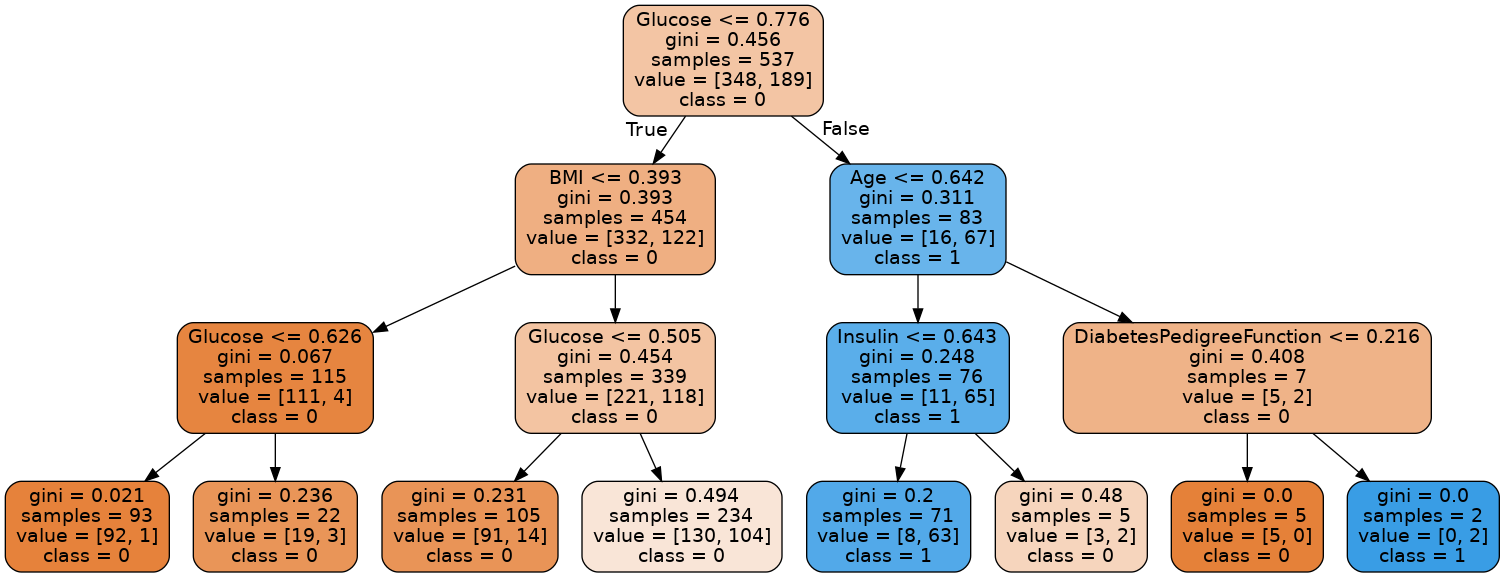

In [76]:
export_graphviz(clf1, out_file="models/tree.dot", feature_names=trainX.columns, class_names=["0","1"], filled=True, rounded=True)
g = pydotplus.graph_from_dot_file(path="models/tree.dot")
Image(g.create_png())

In [77]:
pred = clf1.predict_proba(testX)
pred = np.argmax(pred, axis=1)

In [78]:
mse = ((pred - y_test.values)**2).mean(axis=0)
mse

0.25217391304347825